# Full Code used in article Senators’ Response to Black Lives Matter during the 2020 Election Campaign: Evidence from Twitter 

## Time Series Analysis

In [1]:
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
from sklearn import linear_model
from textblob import TextBlob
import nltk

ModuleNotFoundError: No module named 'textblob'

In [ ]:
#Data Processing
labeled_df = pd.read_csv('labeled.csv')
day_string_split = lambda x: x[0:10]
labeled_df['day'] = labeled_df['time'].apply(day_string_split)
day_freq_check = labeled_df[labeled_df['time'].str.contains('2020-05') | labeled_df['time'].str.contains('2020-06') | labeled_df['time'].str.contains('2020-07') | 
            labeled_df['time'].str.contains('2020-08') | labeled_df['time'].str.contains('2020-09') | labeled_df['time'].str.contains('2020-10')]
party = day_freq_check.groupby('party')
d = party.get_group('Democratic')
r = party.get_group('Republican')
d['day'] = d['time'].apply(day_string_split)
r['day'] = r['time'].apply(day_string_split)

#Plot change of portion of tweet sent by two parties, before and after the murder of George Floyd
plt.rcParams['figure.figsize'] = [20, 15]

fig,ax=plt.subplots()
d_day_freq = day_freq_check.groupby('party').get_group('Democratic').value_counts('day', sort = False)
r_day_freq = day_freq_check.groupby('party').get_group('Republican').value_counts('day', sort = False)
both_day_freq = d_day_freq + r_day_freq
ax.plot(pd.date_range('2020-05-01','2020-10-31',freq='D'), d_day_freq / both_day_freq, label = 'Democratic', color = 'blue')
ax.plot(pd.date_range('2020-05-01','2020-10-31',freq='D'), r_day_freq / both_day_freq, label = 'Republican', color = 'red')
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range('2020-05-01','2020-10-30', freq='10D'), rotation=45, fontsize = 20) 
plt.vlines('2020-05-25', 0.2, 0.8, color = 'black')
ax.set_title('Tweet Percentage of Two Parties', fontsize = 20)
ax.set_ylabel('Percentage', fontsize = 20)
ax.legend(fontsize = 20)

fig.show()

## Political Framing Correlation Heatmap

In [ ]:
# Define Function: To calculate the word frequency of a certain political framing on daily basis

def str_freq_overview(L, dataframe = file):
    df = dataframe[dataframe['text'].str.contains('|'.join(L), na = False)]
    str = ''
    for i in L:
        str += i + ','
    str = str[:-1]
    freq_df = pd.DataFrame(data = [], columns = [str], index = index)
    freq_df[str] = freq_df[str].apply(lambda x: 0)
    string_split = lambda x: x[0:10]
    one_file = df
    one_file['new_time'] = one_file['time'].apply(string_split)
    obj = one_file['new_time'].value_counts()
    df_new = pd.DataFrame(data = obj)
    daily_total_tweet=dataframe['time'].apply(string_split).value_counts()
    for i in df_new.index:
        freq_df.loc[i] += int(df_new.loc[i])/daily_total_tweet[i]
    return freq_df[:len(freq_df) - 1]

In [ ]:
#Data Processing: Select data from May 2020 to October 2020.

index = list(pd.date_range('2020-05-01','2020-10-31', freq = 'D'))

file = pd.read_csv('labeled.csv')
lower = lambda x: x.lower()
file['text'] = file['text'].apply(lower)
file = file[file['time'].str.contains('2020-05') | file['time'].str.contains('2020-06') | file['time'].str.contains('2020-07') | 
            file['time'].str.contains('2020-08') | file['time'].str.contains('2020-09') | file['time'].str.contains('2020-10')]

In [ ]:
#Select keywords representations for different political framing.

L = [['terrorist', 'anarchy', 'riot', 'loot', 'antifa'],['law', 'order', 'security', 'rule', 'riot', 'ban'], 
     ['allies', 'action','fight','outrage', 'oppression','anger'],['racism', 'race','injustice', 'justice', 'equality', 'inequality'], ['blm', 'black lives matter']]

/Users/lizhaozhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


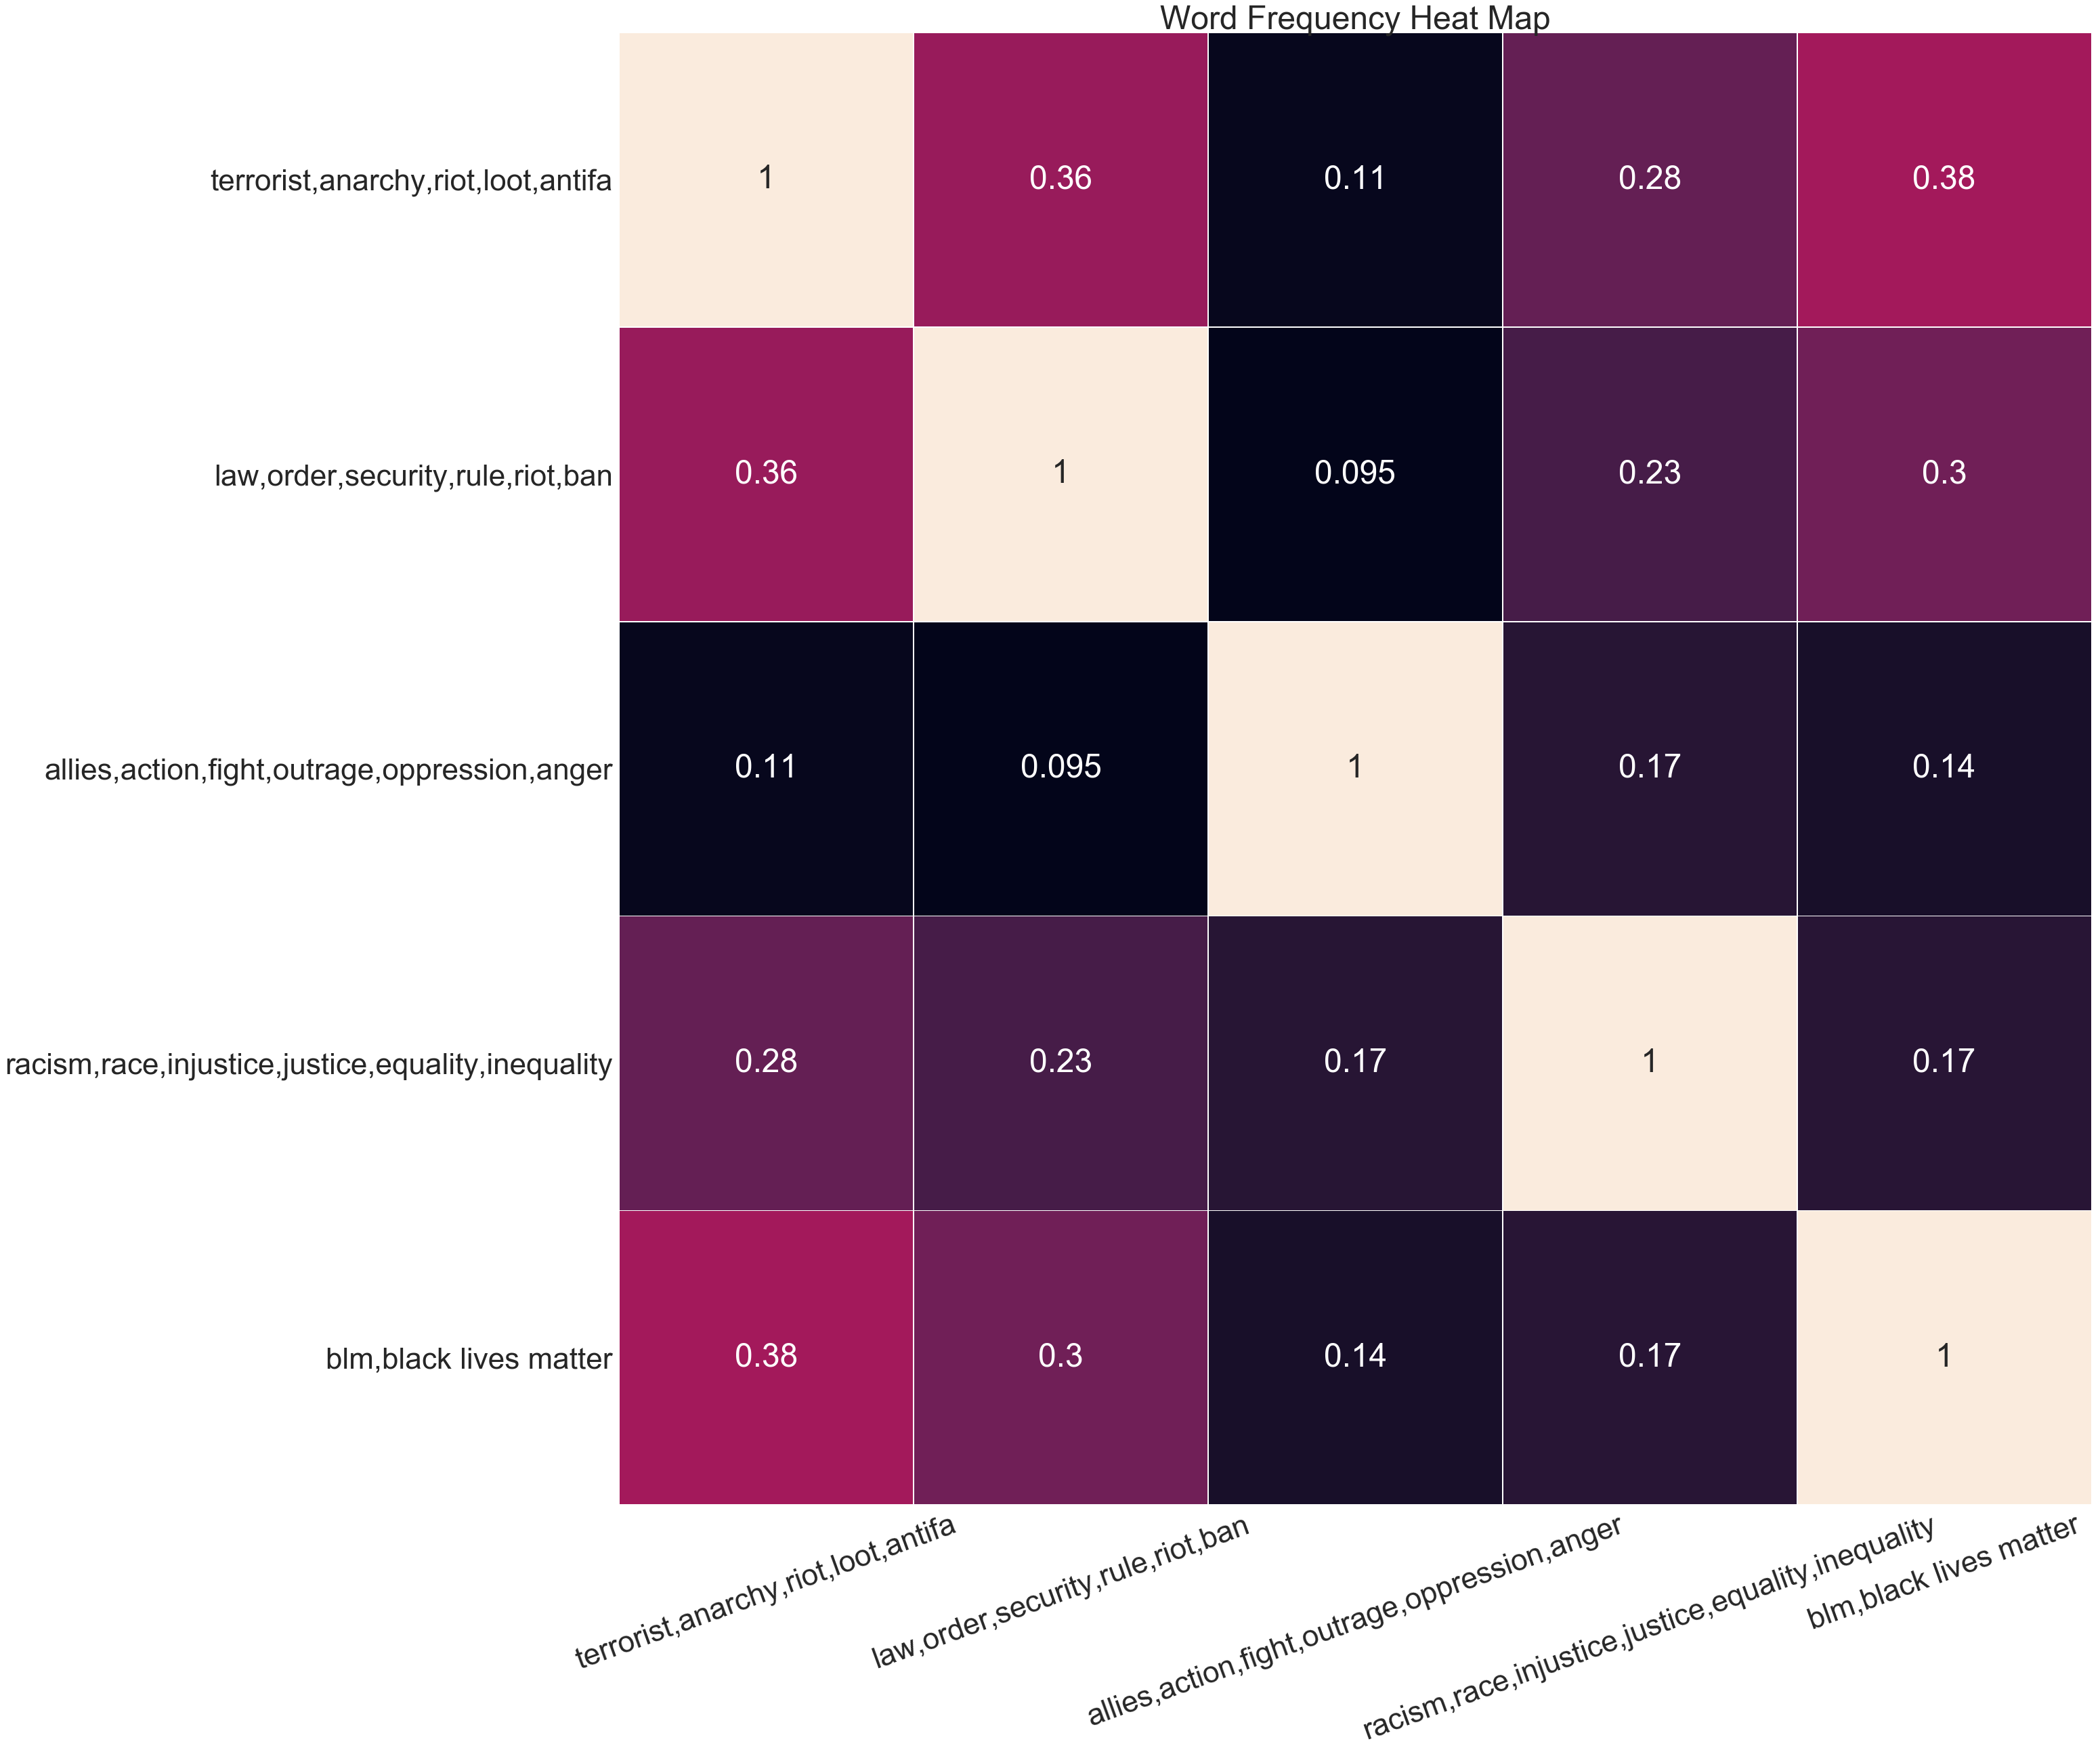

In [25]:
#Plot overall correlation heatmap of political framings
l = []
for i in L:
    l.append(str_freq_overview(i, file))

merge = pd.concat(l, axis = 1)
corrmat3 = merge.corr()
 
f, ax = plt.subplots(figsize=(50, 40))
sns.heatmap(corrmat3, vmax=.8, annot=True,square=True,cbar=False,linewidths = 0.7).set_title('Word Frequency Heat Map')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
sns.set(font_scale=4)

f.savefig('all.jpg', figsize=(50,50))

/Users/lizhaozhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


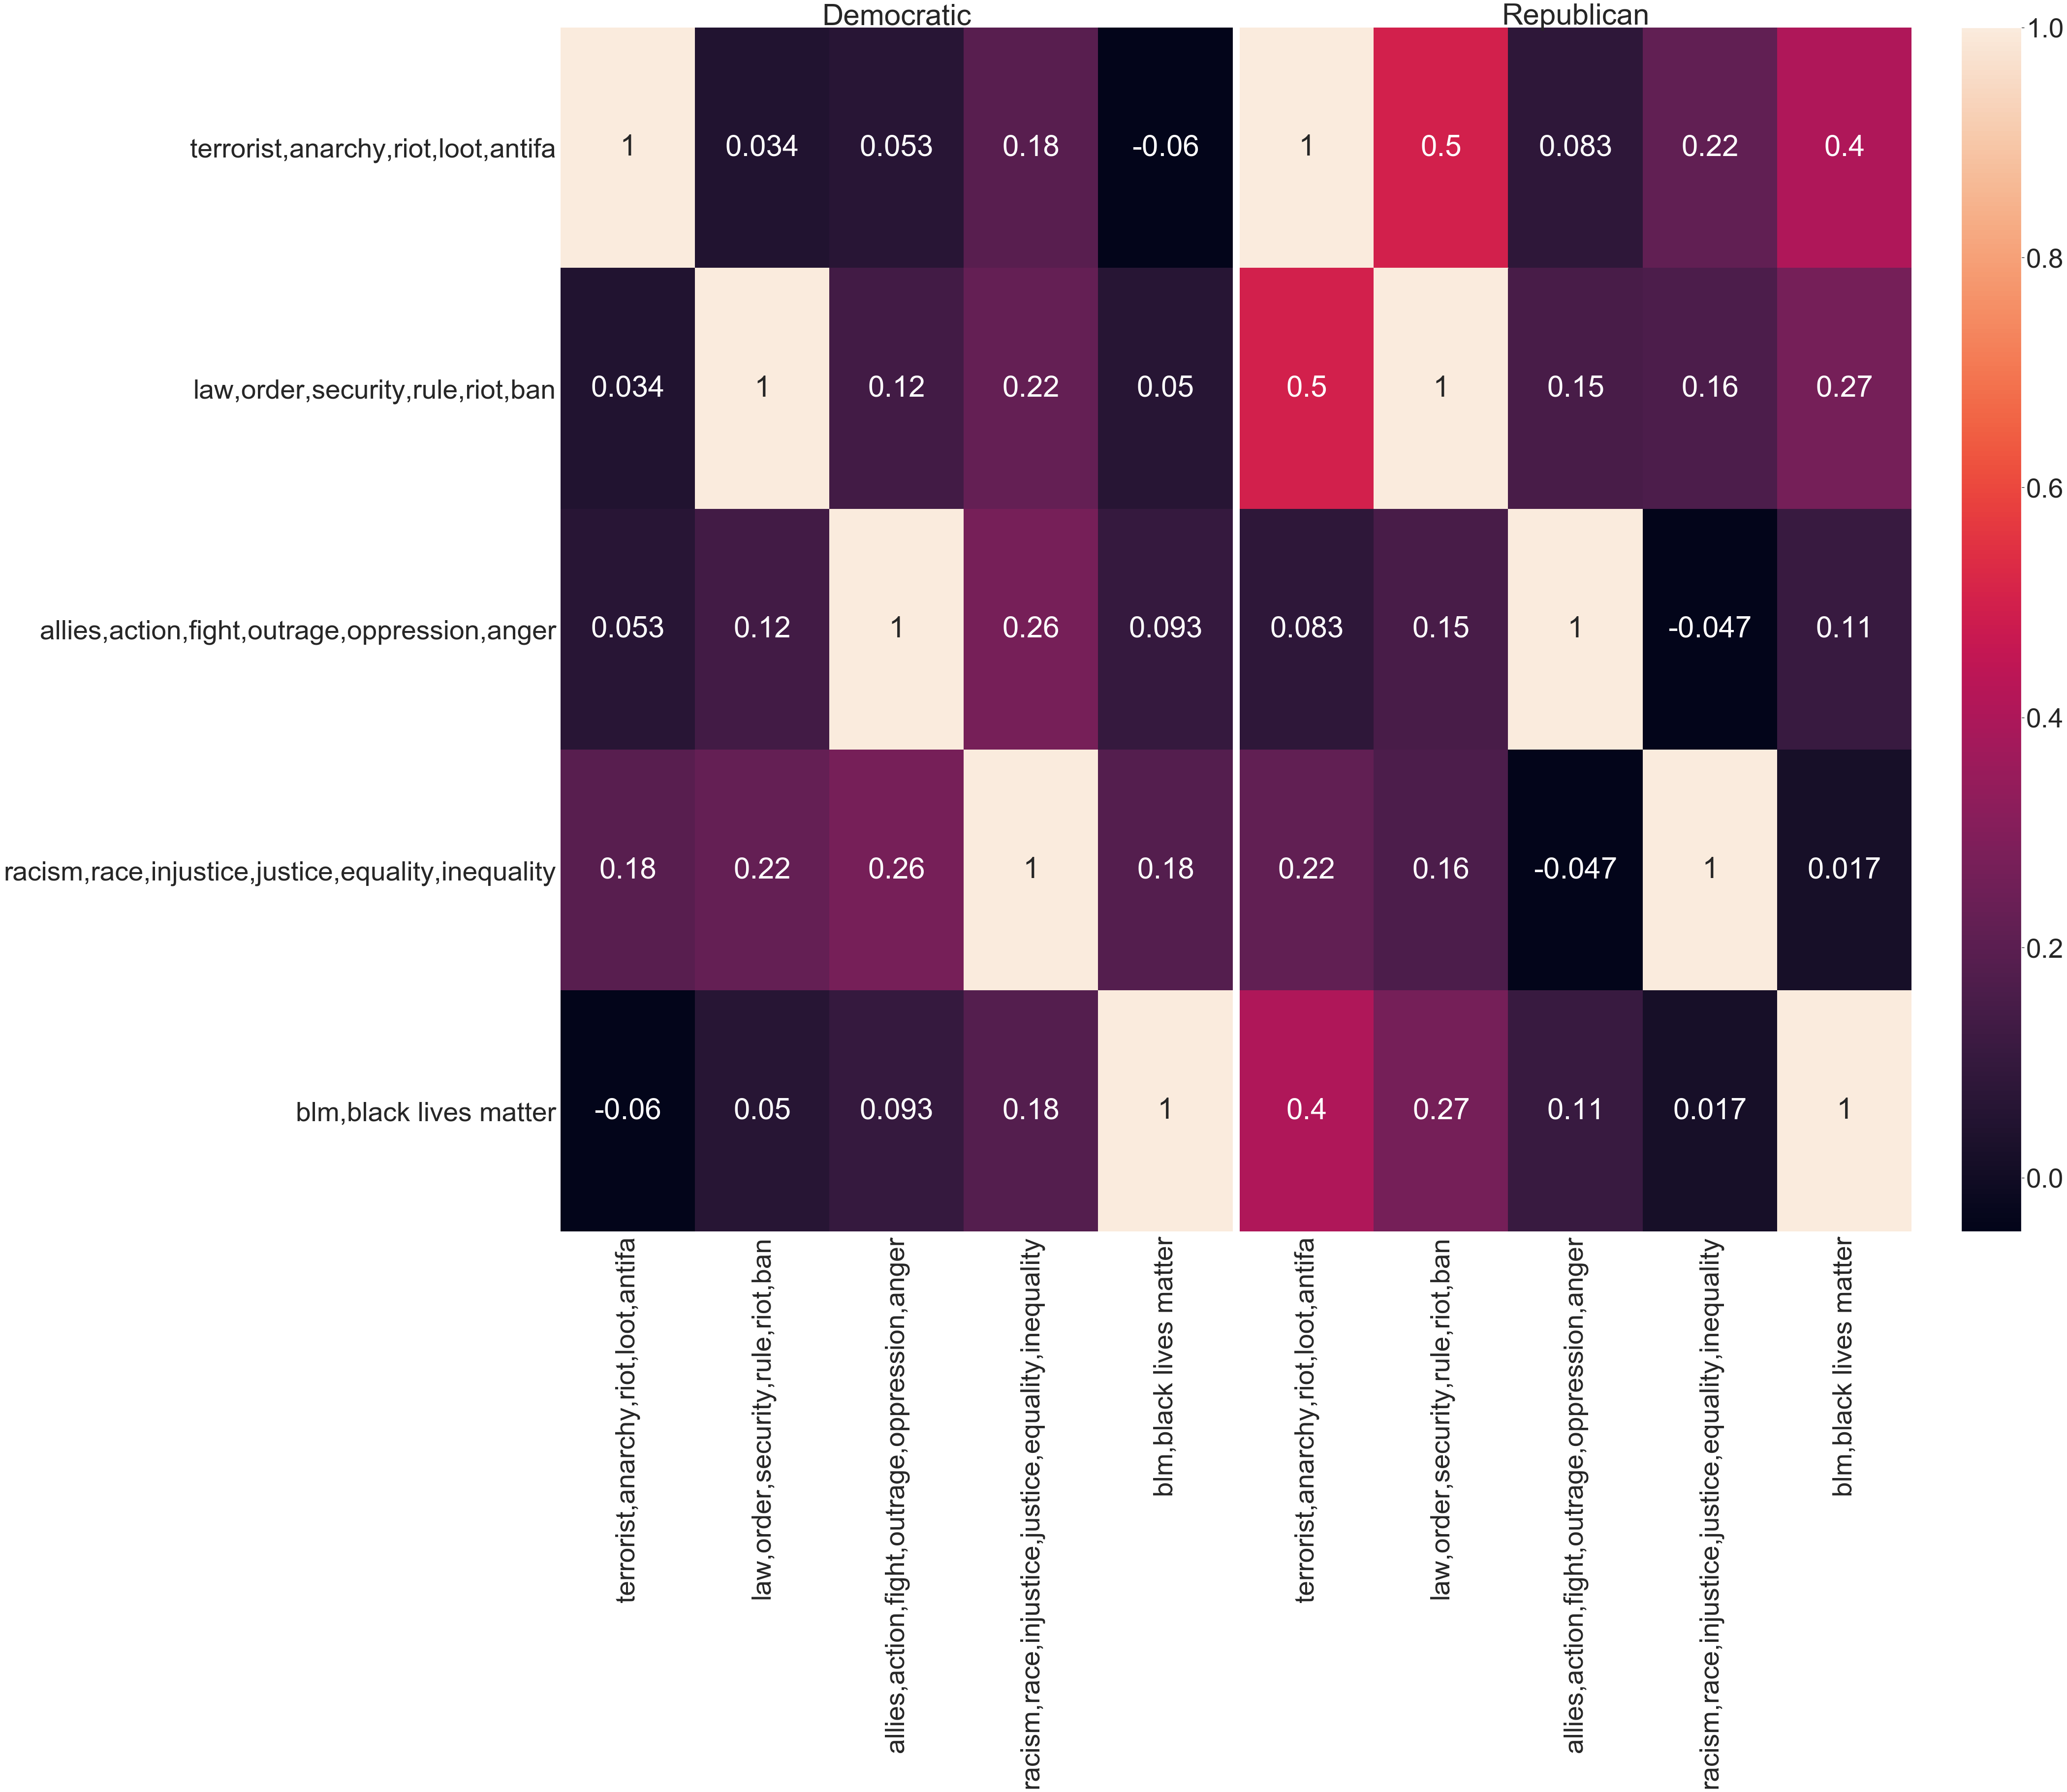

<Figure size 432x288 with 0 Axes>

In [17]:
#Plot correlation heatmap of political framings for democrats and republicas respectively.

#Calculate correlation matrix for democrats
d = file[file['party'] =='Democratic']
l=[]
for i in L:
    l.append(str_freq_overview(i, d))
merge = pd.concat(l, axis = 1)
corrmat_d = merge.corr()

#Calculate correlation matrix foor republicans
r = file[file['party'] =='Republican']
l=[]
for i in L:
    l.append(str_freq_overview(i, r))
merge = pd.concat(l, axis = 1)
corrmat_r = merge.corr()


#Plot
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(60, 45))
fig.subplots_adjust(wspace=0.01)
 
sns.heatmap(corrmat_d, cmap="rocket", ax=ax1,annot=True, cbar=False).set_title('Democratic')
sns.heatmap(corrmat_r,  cmap="rocket",ax=ax2,annot=True, cbar=False,yticklabels=False,).set_title('Republican')
fig.colorbar(ax2.collections[0], ax=[ax1,ax2], location="right", use_gridspec=False, pad=0.03)

ax2.yaxis.tick_right()
ax2.tick_params(rotation=90)

sns.set(font_scale=5)

plt.show()
plt.tight_layout()
fig.savefig('party.jpg', dpi=300, bbox_inches="tight")

## Calculate Tweeting Frequency change 

In [ ]:
#Define Function

def dif_days(n, file=fil, date_time_str='2020-05-25'):
    from datetime import datetime, timedelta
    event=datetime.strptime(date_time_str, '%Y-%m-%d')
    days_before = event - timedelta(days=n)
    days_after = event + timedelta(days=n)
    
    index_now=file[file['time']==event].index[0]
    index_before=file[file['time']==days_before].index[0]
    index_after=file[file['time']==days_after].index[0]
    
    return ((index_before-index_now)-(index_now-index_after))/(index_before-index_now)

In [19]:
#Data processing

fil = pd.read_csv('labeled.csv')
fil=fil.sort_values(by='time',ascending=False)
fil.reset_index(drop=True, inplace=True)
string_split = lambda x: x[0:10]
fil['time']=fil['time'].apply(string_split)
fil['time'] = pd.to_datetime(fil['time'])

republican=fil[fil['party']=='Republican']
republican.reset_index(drop=True, inplace=True)
democratic=fil[fil['party']=='Democratic']
democratic.reset_index(drop=True, inplace=True)

#Calculate frequency change by percentage
dif_days(n=14, file=republican, date_time_str='2020-05-25')

0.21810905452726362